# Задание 03

### 1. Связь AUC-ROC  и доли верных ответов (2 балла)
Пусть дана некоторая выборка $X$ и классификатор $b(x)$, возвращающий в качестве оценки принадлежности объекта $x$ к положительному классу 0 или 1 (а не вероятности). 

1) Постройте ROC-кривую для классификатора $b(x)$ на выборке $X$.

2) Покажите, что AUC-ROC классификатора $b(x)$ может быть выражена через долю правильных ответов и полноту классификатора $a(x;t)$, получающегося при выборе некоторого порога $t \in (0;1)$ ($a(x)=[b(x)>t]$). Помимо указанных величин в формулу могут входить $N,N_+,N_-$, число объектов, число положительных и отрицательных объектов в выборке $X$ соответсвенно. 


### 2. ROC, PR кривые  (2 балла)
Алгоритм  бинарной классификации выдает оценки вероятности принадлежности к положительному классу  $b_i=\hat{\mathcal{ P}}(y_i=+|x_i)$. Всего есть $N=10 000$ наблюдений. Если ранжировать их по возрастанию $b_i$, то окажется, что наблюдения с $y_i=1$ и наблюдения с $y_i=0$ образуют чередующиеся блоки различного размера:
$$
\underbrace{-------}_{3N/8}\underbrace{+++++++}_{3N/8}\underbrace{-------}_{N/8}\underbrace{+++++++}_{N/8}
$$
Постройте $ROC$ и $PR$ кривые, определите площади под кривыми. 

## 1.Связь AUC-ROC и доли верных ответов
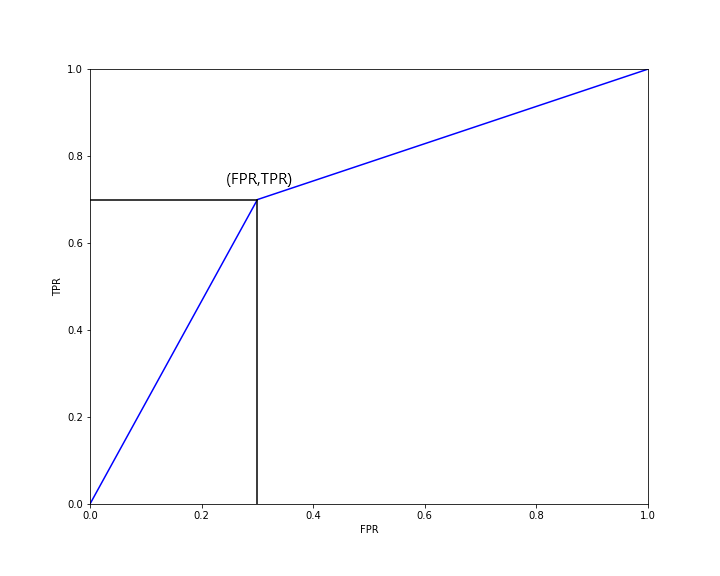

1) Выбору порога соответствует выбор точки на ROC-кривой. Так как в нашем случае алгортим возвращает бинарный ответ (0 или 1), то ROC кривая состоит всего из трёх точек - (0,0), (FPR,TPR) и (1,1).

2) Вычислим площадь под данной кривой как площадь двух треугольников и квадрата. 

$$
\frac{TPR*FPR}{2}+\frac{(1-TPR)*(1-FPR)}{2}+TPR*(1-FPR) = \frac{1+TPR-FPR}{2} \;\;\; (1)  
$$ 

Найдём разность между TPR и FPR
$$FPR = \frac{FP}{FP + TN},$$
$$TPR = \frac{TP}{FN + TP}.$$

$$
TPR-FPR = \frac{TP*FP+TP*TN-FP*TP-FP*FN}{(TP+FN)*(FP+TN)} = \frac{TP*TN-FP*FN}{N_+*N_-}  \;\;\; (2)
$$

Зная recall выразим TP:

$$recall = \frac{TP}{TP + FN}$$

$$TP = recall*N_+$$

Знаяя accuracy и TP выразим TN:

$$accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

$$TN = N*accuracy - TP = N*accuracy - recall*N_+$$

Теперь выразив TP и TN можем получить FN и FP:

$$FN = N_+ - TP = N_+ - recall*N_+$$

$$FP = N_- - TN = N_- - N*accuracy + recall*N_+$$

Таким образом, подставив выраженные величины в формулу (2), а затем в (1), мы получим площадь под нашей ROC кривой, выраженную через accuracy, recall, $N$, $N_+$ и $N_-$

## 2. ROC, PR кривые
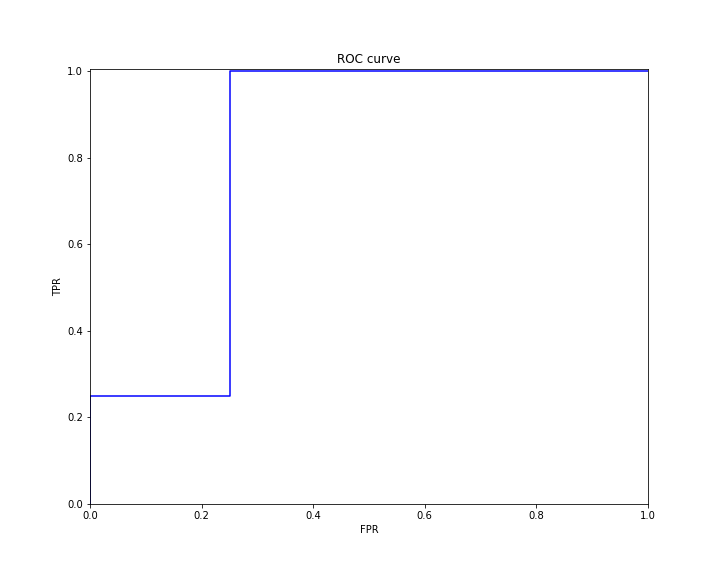

#### Площадь под ROC кривой = сумме площадей двух прямоугольников.
$$AUC ROC = 0.25*0.25 + 1*(1 - 0.25) = 0.8125$$

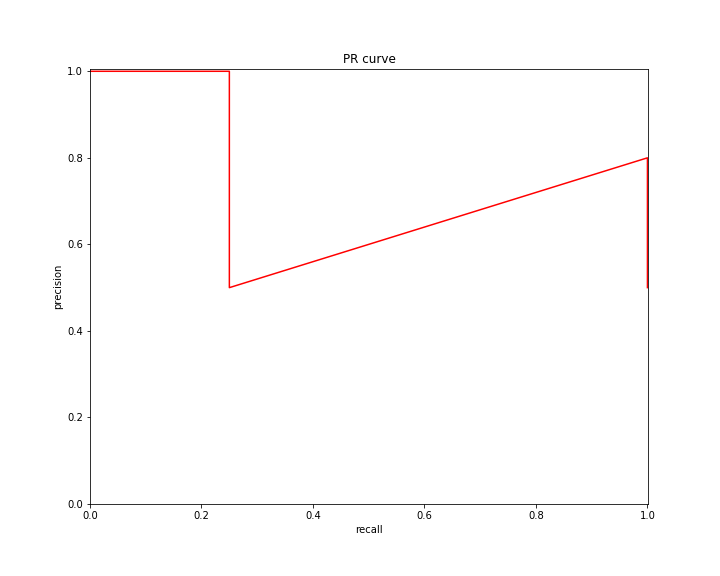

#### Площадь под PR кривой = сумме площадей двух прямоугольников и труегольника.
$$AUC PR = 1*0.25 + 0.5*(1-0.25) + 0.5*((0.8-0.5)*(1-0.25)) = 0.7375$$

### 3. Логистическая регрессия на данных (6 баллов )

In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

from sklearn import metrics

### [Данные](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)
Будем анализировать данные, связанные с прямыми маркетинговыми кампаниями (телефонными звонками) португальского банковского учреждения. Цель классификации - предсказать, будет ли клиент подписывать (1/0) срочный депозит (переменная y).



   #### bank client data:
   * 1 - age (numeric)
   * 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
      "blue-collar","self-employed","retired","technician","services") 
   * 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   * 4 - education (categorical: "unknown","secondary","primary","tertiary")
   * 5 - default: has credit in default? (binary: "yes","no")
   * 6 - balance: average yearly balance, in euros (numeric) 
   * 7 - housing: has housing loan? (binary: "yes","no")
   * 8 - loan: has personal loan? (binary: "yes","no")
   related with the last contact of the current campaign:
   * 9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
   * 10 - day: last contact day of the month (numeric)
   * 11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   * 12 - duration: last contact duration, in seconds (numeric)
   other attributes:
   * 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
   * 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
   * 15 - previous: number of contacts performed before this campaign and for this client (numeric)
   * 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  #### Output variable (target):
   * 17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

ModuleNotFoundError: No module named 'google'

In [4]:
data = pd.read_csv('bank.csv', sep=';',header=0)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB
None


#### 3.1. Какова доля положительных объектов в выборке?

In [6]:
y = data.iloc[:, -1].values
print(np.count_nonzero(y=='yes')/len(y))

0.11523999115239991


####  3. 2. Подготовка данных. 
1. Подготовьте матрицу объект-признак:
 * удалите (но не навсегда!) целевой признак ('y') 

 * удалите признак 'day' (можно навсегда) 

 * Все категориальные признаки преобразуйте в бинарные, используя [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html). 


2. Подготовьте целевой вектор: 
    
 * преобразуйте признак 'y' в вектор, состоящий из нулей (y='no') и единиц (y='yes').
 

In [7]:
data = data.drop(columns=['day'])

In [8]:
data_f = pd.get_dummies(data.drop(columns=['y']))
#data_f.head()
#data.head()
X, y = data_f.iloc[:, :-1].values, data.iloc[:, -1].values
y[y=='no'] = 0
y[y=='yes'] = 1
y=y.astype('int')

print(X.shape,y.shape)

(4521, 49) (4521,)


#### 3. 3. Логистическая регрессия.

* Разделите выборку в соотношении 70:30;

* Обучите логистическую регрессию с параметрами по умолчанию. 


In [9]:
np.random.seed(17)
lr = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3)

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### 3.4. Чему равны следующие метрики качества:

   * Доля верных предсказаний,
   * Точность,
   * Полнота,
   * F1-мера? 

In [10]:
print ('Accuracy =', metrics.accuracy_score(y_test, y_pred))
print ('Precision =', metrics.precision_score(y_test, y_pred))
print ('Recall =', metrics.recall_score(y_test, y_pred))
print ('F1 score =', metrics.f1_score(y_test, y_pred))

Accuracy = 0.9115696389093588
Precision = 0.6557377049180327
Recall = 0.28776978417266186
F1 score = 0.39999999999999997


#### 3.5. Постройте ROC кривую и найдите площадь под кривой. 

In [23]:
probs = lr.predict_proba(X_test)

print(probs)

fpr, tpr, thresholds = metrics.roc_curve(y_test, probs[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

[[0.94536465 0.05463535]
 [0.96754395 0.03245605]
 [0.97333421 0.02666579]
 ...
 [0.99180665 0.00819335]
 [0.90400901 0.09599099]
 [0.99453364 0.00546636]]


ValueError: Found input variables with inconsistent numbers of samples: [904, 1357]

In [12]:
print('AUC-ROC = ',metrics.auc(fpr, tpr))

AUC-ROC =  0.8842246399924396


#### 3.6. Порог $t$ в модели логистической регрессии по умолчанию $t=0.5$. 

$a(x) = \begin{cases}
        +1, \, b(x) \ge t,\\
        -1, \, b(x) < t.
        \end{cases}$ 
        
Измените порог на $t=0.2$. Как изменятся метрики качества для такого классификатора? 


In [13]:
threshold = 0.2
alt_y_pred = np.where(lr.predict_proba(X_test)[:,1] > threshold, 1, 0)

print ('Accuracy =', metrics.accuracy_score(y_test, alt_y_pred))
print ('Precision =', metrics.precision_score(y_test, alt_y_pred))
print ('Recall =', metrics.recall_score(y_test, alt_y_pred))
print ('F1 score =', metrics.f1_score(y_test, alt_y_pred))

Accuracy = 0.8703021370670597
Precision = 0.41148325358851673
Recall = 0.6187050359712231
F1 score = 0.49425287356321834


Доля верных предсказаний и точность понизились из-за снижения порога отнесения к положительному классу, однако значительно повысилась полнота и F1-мера

#### 3.7. Постройте логистическую регрессию, штрафующую несбалансированные классы по-разному (пропорционально доли класса). Как изменились метрики качества классификатора? 

In [14]:
lr = LogisticRegression(class_weight = 'balanced')

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3)

lr.fit(X_train, y_train)

y_pred2 = lr.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
print ('Accuracy =', metrics.accuracy_score(y_test, y_pred2))
print ('Precision =', metrics.precision_score(y_test, y_pred2))
print ('Recall =', metrics.recall_score(y_test, y_pred2))
print ('F1 score =', metrics.f1_score(y_test, y_pred2))

Accuracy = 0.8297715549005158
Precision = 0.38819875776397517
Recall = 0.7861635220125787
F1 score = 0.5197505197505198


Доля верных предсказаний уменьшилась, также снизилась точность. Однако, повысилось значение полноты и F1 меры.

#### 3.8. Построите логистическую регрессию с L1-регуляризацией. С помощью GridSearchCV определите наилучший гиперпараметр С. 
Воспользуйтесь StratifiedKFold для кросс-валидации, при таком разбиении сохраняется соотношение классов в обучающей и тестовой выборках. 

In [16]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits = 5 , shuffle = True , random_state = np.random.seed(17))
cv_score =[]

for train_index,test_index in kf.split(X,y):
    x_train , x_test = X[train_index],X[test_index]
    y_train , y_test = y[train_index],y[test_index]
    
    lr = LogisticRegression(penalty = 'l1')
    lr.fit(x_train,y_train)
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test,lr.predict_proba(x_test)[:, 1])
    cv_score.append(metrics.auc(fpr, tpr)) 

print('Mean cv Score',np.mean(cv_score))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Mean cv Score 0.8901274954212454


In [17]:
alphas=np.logspace(-2,3,21)
param_grid = {'C': alphas}
cv = 6

optimizer = GridSearchCV(LogisticRegression(penalty = 'l1'), param_grid, cv = cv)

optimizer.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=6, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.00000e-02, 1.77828e-02, 3.16228e-02, 5.62341e-02, 1.00000e-01,
       1.77828e-01, 3.16228e-01, 5.62341e-01, 1.00000e+00, 1.77828e+00,
       3.16228e+00, 5.62341e+00, 1.00000e+01, 1.77828e+01, 3.16228e+01,
       5.62341e+01, 1.00000e+02, 1.77828e+02, 3.16228e+02, 5.62341e+02,
       1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [18]:
print(optimizer.best_params_)

{'C': 0.5623413251903491}


In [19]:
kf = StratifiedKFold(n_splits = 5 , shuffle = True , random_state = np.random.seed(17))
cv_score =[]

for train_index,test_index in kf.split(X,y):
    x_train , x_test = X[train_index],X[test_index]
    y_train , y_test = y[train_index],y[test_index]
    
    lr = LogisticRegression(penalty = 'l1', C = optimizer.best_params_['C'])
    lr.fit(x_train,y_train)
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test,lr.predict_proba(x_test)[:, 1])
    cv_score.append(metrics.auc(fpr, tpr)) 

print('Mean cv Score',np.mean(cv_score))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Mean cv Score 0.8909347985347985


#### 3.9. Постройте зависимость средней ошибки классификатора (доля верных предсказаний) от значения параметра регуляризации. 

In [20]:
counts = []
for c1 in alphas:
    lr = LogisticRegression(C = c1)
    kf = StratifiedKFold(n_splits = 5 , shuffle = True , random_state = np.random.seed(17))
    ac_score =[]

    for train_index,test_index in kf.split(X,y):
        x_train , x_test = X[train_index],X[test_index]
        y_train , y_test = y[train_index],y[test_index]
    
        lr.fit(x_train,y_train)
        ac_score.append(metrics.accuracy_score(y_test, lr.predict(x_test)))
    counts.append(np.mean(ac_score))
print(counts)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

[0.8880792548770351, 0.8911758666210335, 0.8933870336869896, 0.8947144673153083, 0.8964836454309882, 0.8991372903730503, 0.8998005182613797, 0.9004642350755392, 0.900242996137486, 0.900464235075539, 0.900464235075539, 0.900021757199433, 0.900464235075539, 0.9006854740135923, 0.8998005182613799, 0.9006854740135921, 0.9022339021170488, 0.9013491908277516, 0.9011277074267834, 0.9002429961374858, 0.900021757199433]


Text(0, 0.5, 'accuracy')

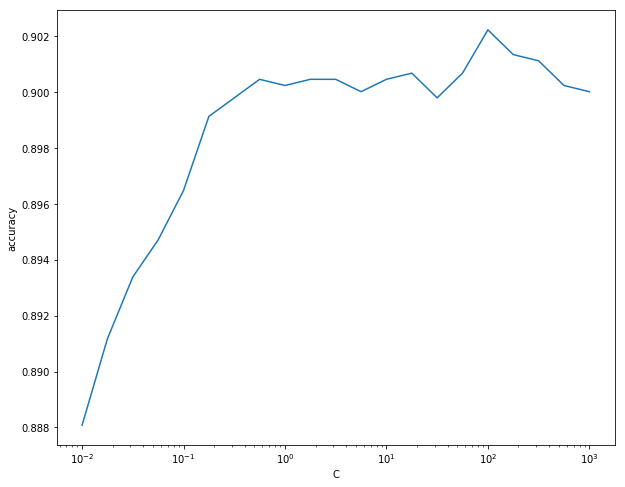

In [21]:
plt.rcParams["figure.figsize"] = (10, 8) 
plt.plot(alphas, counts)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("accuracy")